<a href="https://colab.research.google.com/github/sushma0981999/python-assignment-unp-exe1/blob/main/exe_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/ML-Challenge/learntools.git
from learntools.core import binder;binder.bind(globals())
from learntools.python.ex7 import *
print("setup complete!")

  Cloning https://github.com/ML-Challenge/learntools.git to /tmp/pip-req-build-pmqtshso
  Running command git clone -q https://github.com/ML-Challenge/learntools.git /tmp/pip-req-build-pmqtshso
  Created wheel for learntools: filename=learntools-0.3.4-py3-none-any.whl size=207310 sha256=b160e3f47dcac9927a9d321b7915ebfca3b5d2eb20757fad0e08fc13569f9628
  Stored in directory: /tmp/pip-ephem-wheel-cache-nsj7lkr6/wheels/5e/42/53/aa3198486cfc460e19152f9f799b8d0f549cb88f492acb6033
Successfully built learntools
setup complete!


1.

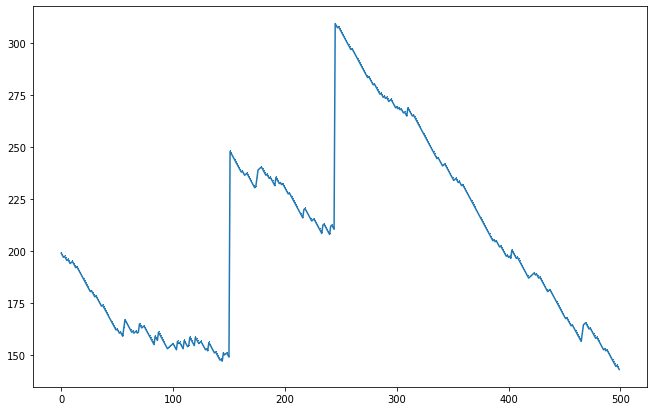

In [2]:
# Import the jimmy_slots submodule
from learntools.python import jimmy_slots
# Call the get_graph() function to get Jimmy's graph
graph = jimmy_slots.get_graph()
graph

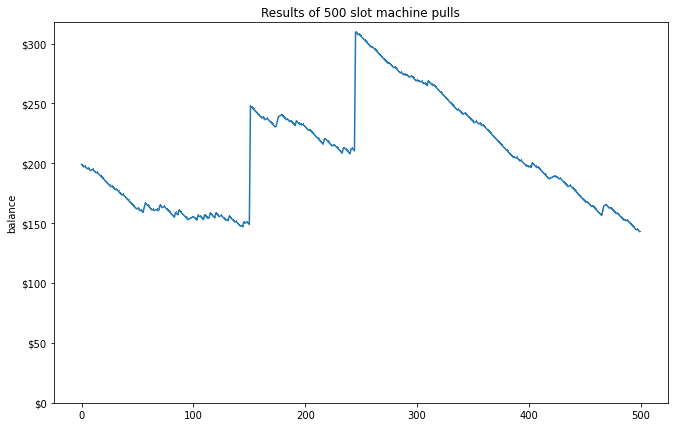

In [6]:
def prettify_graph(graph):
    graph.set_title("Results of 500 slot machine pulls")
    graph.set_ylim(bottom=0)
    graph.set_ylabel("balance")
    ticks=graph.get_yticks()
    new_labels=['${}'.format(int(amt)) for amt in ticks]
    graph.set_yticklabels(new_labels)

graph = jimmy_slots.get_graph()
prettify_graph(graph)
graph


In [7]:
def best_items(racers):
    """Given a list of racer dictionaries, return a dictionary mapping items to the number
    of times those items were picked up by racers who finished in first place.
    """
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for i in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if i not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer['name'] is None:
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name'])
                 )
    return winner_item_counts

2.

In [12]:
# Import luigi's full dataset of race data
from learntools.python.luigi_analysis import full_dataset

# Fix me!
def best_items(racers):
    winner_item_counts = {}
    for i in range(len(racers)):
        # The i'th racer dictionary
        racer = racers[i]
        # We're only interested in racers who finished in first
        if racer['finish'] == 1:
            for item in racer['items']:
                # Add one to the count for this item (adding it to the dict if necessary)
                if i not in winner_item_counts:
                    winner_item_counts[i] = 0
                winner_item_counts[i] += 1

        # Data quality issues :/ Print a warning about racers with no name set. We'll take care of it later.
        if racer['name'] is None:
            print("WARNING: Encountered racer with unknown name on iteration {}/{} (racer = {})".format(
                i+1, len(racers), racer['name'])
                 )
    return winner_item_counts

# Try analyzing the imported full dataset
best_items(full_dataset)
q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Luigi used the variable name `i` to represent each item in racer['items'].
However, he also used `i` as the loop variable for the outer loop (`for i in range(len(racers))`).
These i's are clobbering each other. This becomes a problem only if we encounter a racer
with a finish of 1 and a name of `None`. If that happens, when we try to print the "WARNING" message,
`i` refers to a string like "green shell", which python can't add to an integer, hence a `TypeError`.

This is similar to the issue we saw when we imported * from `math` and `numpy`. They both contained variables called `log`, and the one we got when we tried to call it was the wrong one.

We can fix this by using different loop variables for the inner and outer loops. `i` wasn't a very
good variable name for the inner loop anyways. `for item in racer['items']` fixes the bug and is 
easier to read.

Variable shadowing bugs like this don't come up super often, but when they do they can take an infuriating amount of time to diagnose!


In [10]:
q2.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> Luigi used the variable name `i` to represent each item in racer['items'].
However, he also used `i` as the loop variable for the outer loop (`for i in range(len(racers))`).
These i's are clobbering each other. This becomes a problem only if we encounter a racer
with a finish of 1 and a name of `None`. If that happens, when we try to print the "WARNING" message,
`i` refers to a string like "green shell", which python can't add to an integer, hence a `TypeError`.

This is similar to the issue we saw when we imported * from `math` and `numpy`. They both contained variables called `log`, and the one we got when we tried to call it was the wrong one.

We can fix this by using different loop variables for the inner and outer loops. `i` wasn't a very
good variable name for the inner loop anyways. `for item in racer['items']` fixes the bug and is 
easier to read.

Variable shadowing bugs like this don't come up super often, but when they do they can take an infuriating amount of time to diagnose!


3.

In [19]:
def hand_total(hand):
    """Helper function to calculate the total points of blackjack hand.
    """
    total=0
    aces=0
    for card in hand:
      if card in['J','Q','K']:
          total +=10
      elif card == 'A':
           aces +=1
      else:
           total +=int(card)
    total += aces
    while total +10 <= 21 and aces > 0:
           total += 10
           aces -=1
    return total
def blackjack_hand_greater_than(hand_1,hand_2):
     total_1=hand_total(hand_1)
     total_2=hand_total(hand_2)
     return total_1 <=21 and (total_1 >total_2 or total_2 >21  )                          
